In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np   # FOR REMOVING OUTLIERS
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv('salary.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manger,5,110000


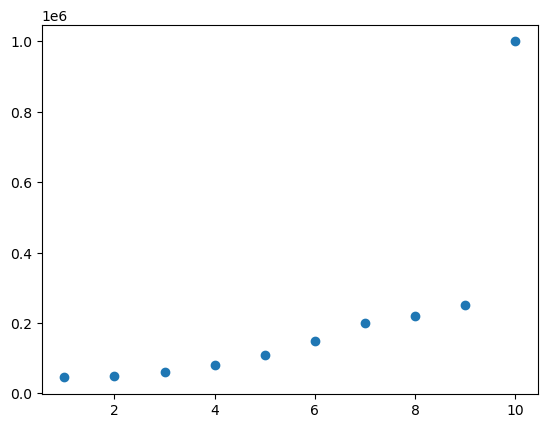

In [4]:
dataset.columns = dataset.columns.str.strip()        # Clean up column names by stripping whitespace
plt.scatter(dataset['Level'], dataset['Salary'])
plt.show()

### I am using this just because of removing a outlier  !!

Original dataset shape: (10, 3)
Dataset shape after removing outliers: (9, 3)


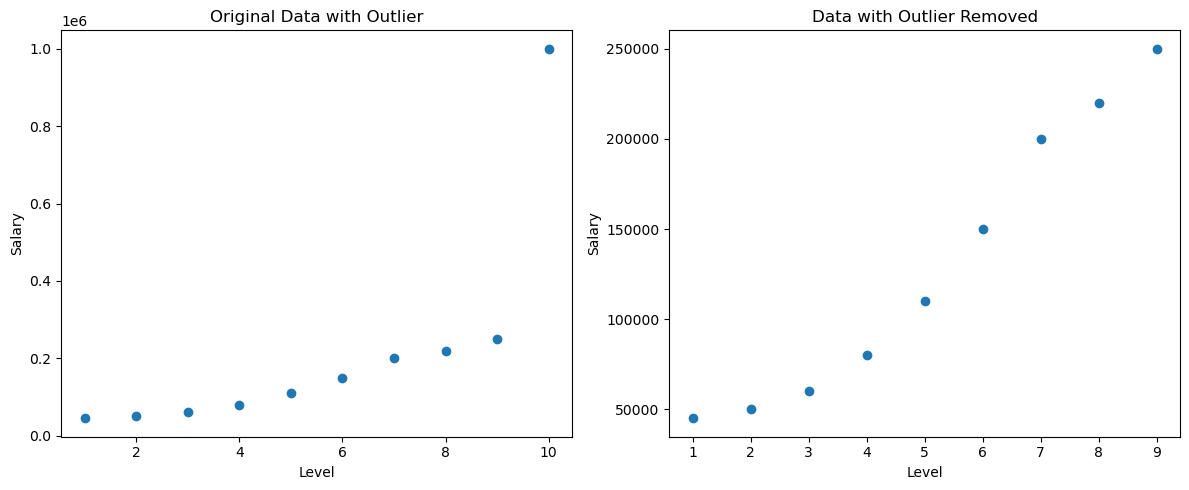

In [5]:
# Step 1 & 2: Calculate Q1, Q3, and IQR for the 'Salary' column
Q1 = dataset['Salary'].quantile(0.25)
Q3 = dataset['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# # Step 4: Filter the dataset to remove outliers
# We keep only the rows where 'Salary' is within the boundaries
dataset1 = dataset[(dataset['Salary'] >= lower_bound) & (dataset['Salary'] <= upper_bound)]

print("Original dataset shape:", dataset.shape)
print("Dataset shape after removing outliers:", dataset1.shape)

# Step 5: Visualize the results for comparison
plt.figure(figsize=(12, 5))

# Plot 1: Original Data
plt.subplot(1, 2, 1) # (1 row, 2 columns, 1st plot)
plt.scatter(dataset['Level'], dataset['Salary'])
plt.title('Original Data with Outlier')
plt.xlabel('Level')
plt.ylabel('Salary')

# Plot 2: Data with Outliers Removed ✨
plt.subplot(1, 2, 2) # (1 row, 2 columns, 2nd plot)
plt.scatter(dataset1['Level'], dataset1['Salary'])
plt.title('Data with Outlier Removed')
plt.xlabel('Level')
plt.ylabel('Salary')

plt.tight_layout() # Adjusts plots to prevent them from overlapping
plt.show()

### There is no need of above program if you data without a outlier

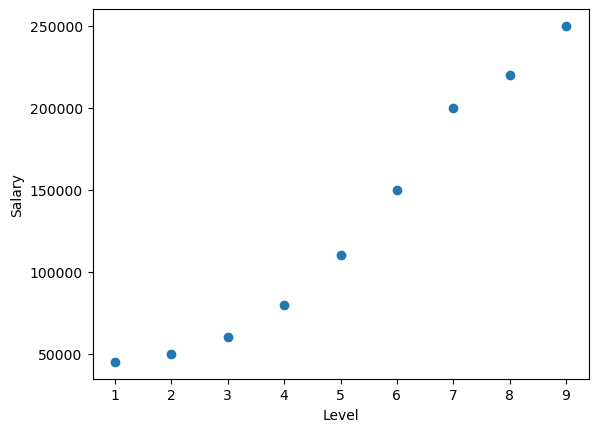

In [6]:
# Clean up column names by stripping whitespace
# plt.scatter(dataset1['Level'], dataset['Salary'])
# plt.show()


# Use the DataFrame that has the outliers removed
plt.scatter(dataset1['Level'], dataset1['Salary'])

plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [7]:
x = dataset1[['Level']]
y = dataset1['Salary']

In [8]:
pf = PolynomialFeatures(degree=2)  # You can change the degree as needed
pf.fit(x)
pf.transform(x)

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.],
       [ 1.,  7., 49.],
       [ 1.,  8., 64.],
       [ 1.,  9., 81.]])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [11]:
lr.score(x_test, y_test)*100

99.26558858837652

In [12]:
# y =m1x + m2x^2 + c

In [13]:
lr.coef_

array([27857.14285714])

In [16]:
lr.intercept_

-11428.571428571347

In [ ]:
prd = lr.predict(x) 

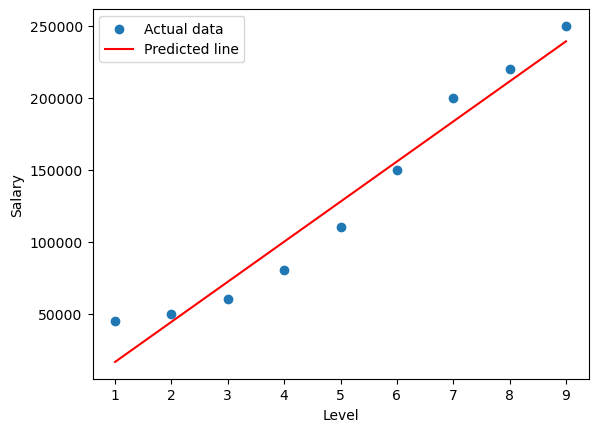

In [15]:
plt.scatter(dataset1['Level'], dataset1['Salary'])
plt.plot(dataset1['Level'], prd, color='red')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend(['Actual data', 'Predicted line'])
plt.show()